# Introduction

For most instances, URL phishing involves the use of emails to redirect recipients to malicious websites. The attackers' goal is to deceive users to disclose sensitive information, such as login credentials or financial details. These websites can be very deceptive as they are skillfully designed to appear familiar and legitimate, their entire goal is to gain users’ trust and “fishing” for their personal information for malicious purposes. The impact of phishing attacks is significant, with businesses in the United States losing up to $2 billion per year as their clients fall victim to these attacks (citation: Gunter Ollmann, “The Phishing Guide Understanding & Preventing Phishing Attacks”, IBMInternet Security Systems, 2007)

This project aims to develop a deep learning model for detecting phishing website by extracting Uniform Resource Locator (URL) features. A diverse dataset containing labeled samples of phishing URLs and legitimate URLs will be collected and used to train the model. By analyzing and extracting URL features and patterns, the model will be trained to accurately identify and classified phishing websites.

A dataset from Mendeley Data will be used (can also be found on Kaggle - https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset?datasetId=1434901), with 11430 URLs and 87 extracted features. The dataset is balanced, it contains 50% phishing URLs and 50% legitimate URLs.


In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN, GRU
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import visualkeras
import tensorflow as tf

In [186]:
data_df = pd.read_csv('dataset_phishing.csv')

In [187]:
data_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [188]:
data_df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [242]:
# Check for native and non-native nulls
features = data_df.iloc[:, 1:]
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
for c in features.columns:
    string_null = np.array([x in a[2:] for x in features[c]])
    print(c, features[c].isnull().sum(), string_null.sum()) 

length_url 0 0
length_hostname 0 0
ip 0 0
nb_dots 0 0
nb_hyphens 0 0
nb_at 0 0
nb_qm 0 0
nb_and 0 0
nb_or 0 0
nb_eq 0 0
nb_underscore 0 0
nb_tilde 0 0
nb_percent 0 0
nb_slash 0 0
nb_star 0 0
nb_colon 0 0
nb_comma 0 0
nb_semicolumn 0 0
nb_dollar 0 0
nb_space 0 0
nb_www 0 0
nb_com 0 0
nb_dslash 0 0
http_in_path 0 0
https_token 0 0
ratio_digits_url 0 0
ratio_digits_host 0 0
punycode 0 0
port 0 0
tld_in_path 0 0
tld_in_subdomain 0 0
abnormal_subdomain 0 0
nb_subdomains 0 0
prefix_suffix 0 0
random_domain 0 0
shortening_service 0 0
path_extension 0 0
nb_redirection 0 0
nb_external_redirection 0 0
length_words_raw 0 0
char_repeat 0 0
shortest_words_raw 0 0
shortest_word_host 0 0
shortest_word_path 0 0
longest_words_raw 0 0
longest_word_host 0 0
longest_word_path 0 0
avg_words_raw 0 0
avg_word_host 0 0
avg_word_path 0 0
phish_hints 0 0
domain_in_brand 0 0
brand_in_subdomain 0 0
brand_in_path 0 0
suspecious_tld 0 0
statistical_report 0 0
nb_hyperlinks 0 0
ratio_intHyperlinks 0 0
ratio_extHyper

# EDA

In [190]:
data_df['target'] = pd.get_dummies(data_df['status'])['legitimate'].astype('int')
data_df.drop('status',axis = 1, inplace=True)
data_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,target
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,1
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,0
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,1
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,1


Text(0.5, 1.0, 'Class distribution')

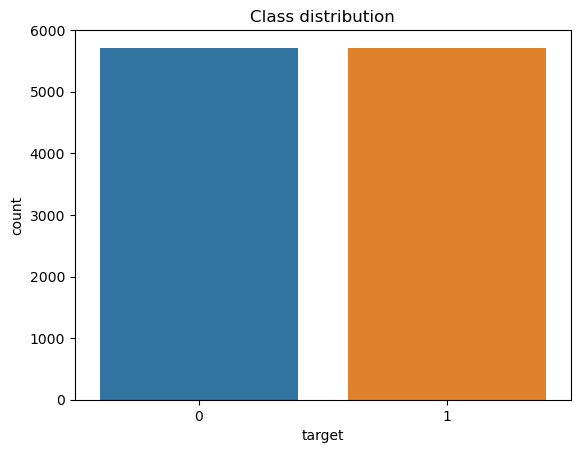

In [191]:
sns.countplot(data_df, x='target')
plt.title("Class distribution")

The distribution of phishing and legitimate website dataset is balance, which is beneficial in training classification problem, allowing the model to avoid bias, which can lead to better generalization.

#### Visualize correlation heatmap between the features

/var/folders/vs/hj3lhms946ndvd2b0jc239r80000gn/T/ipykernel_90988/3134904769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_df.corr()


<Axes: >

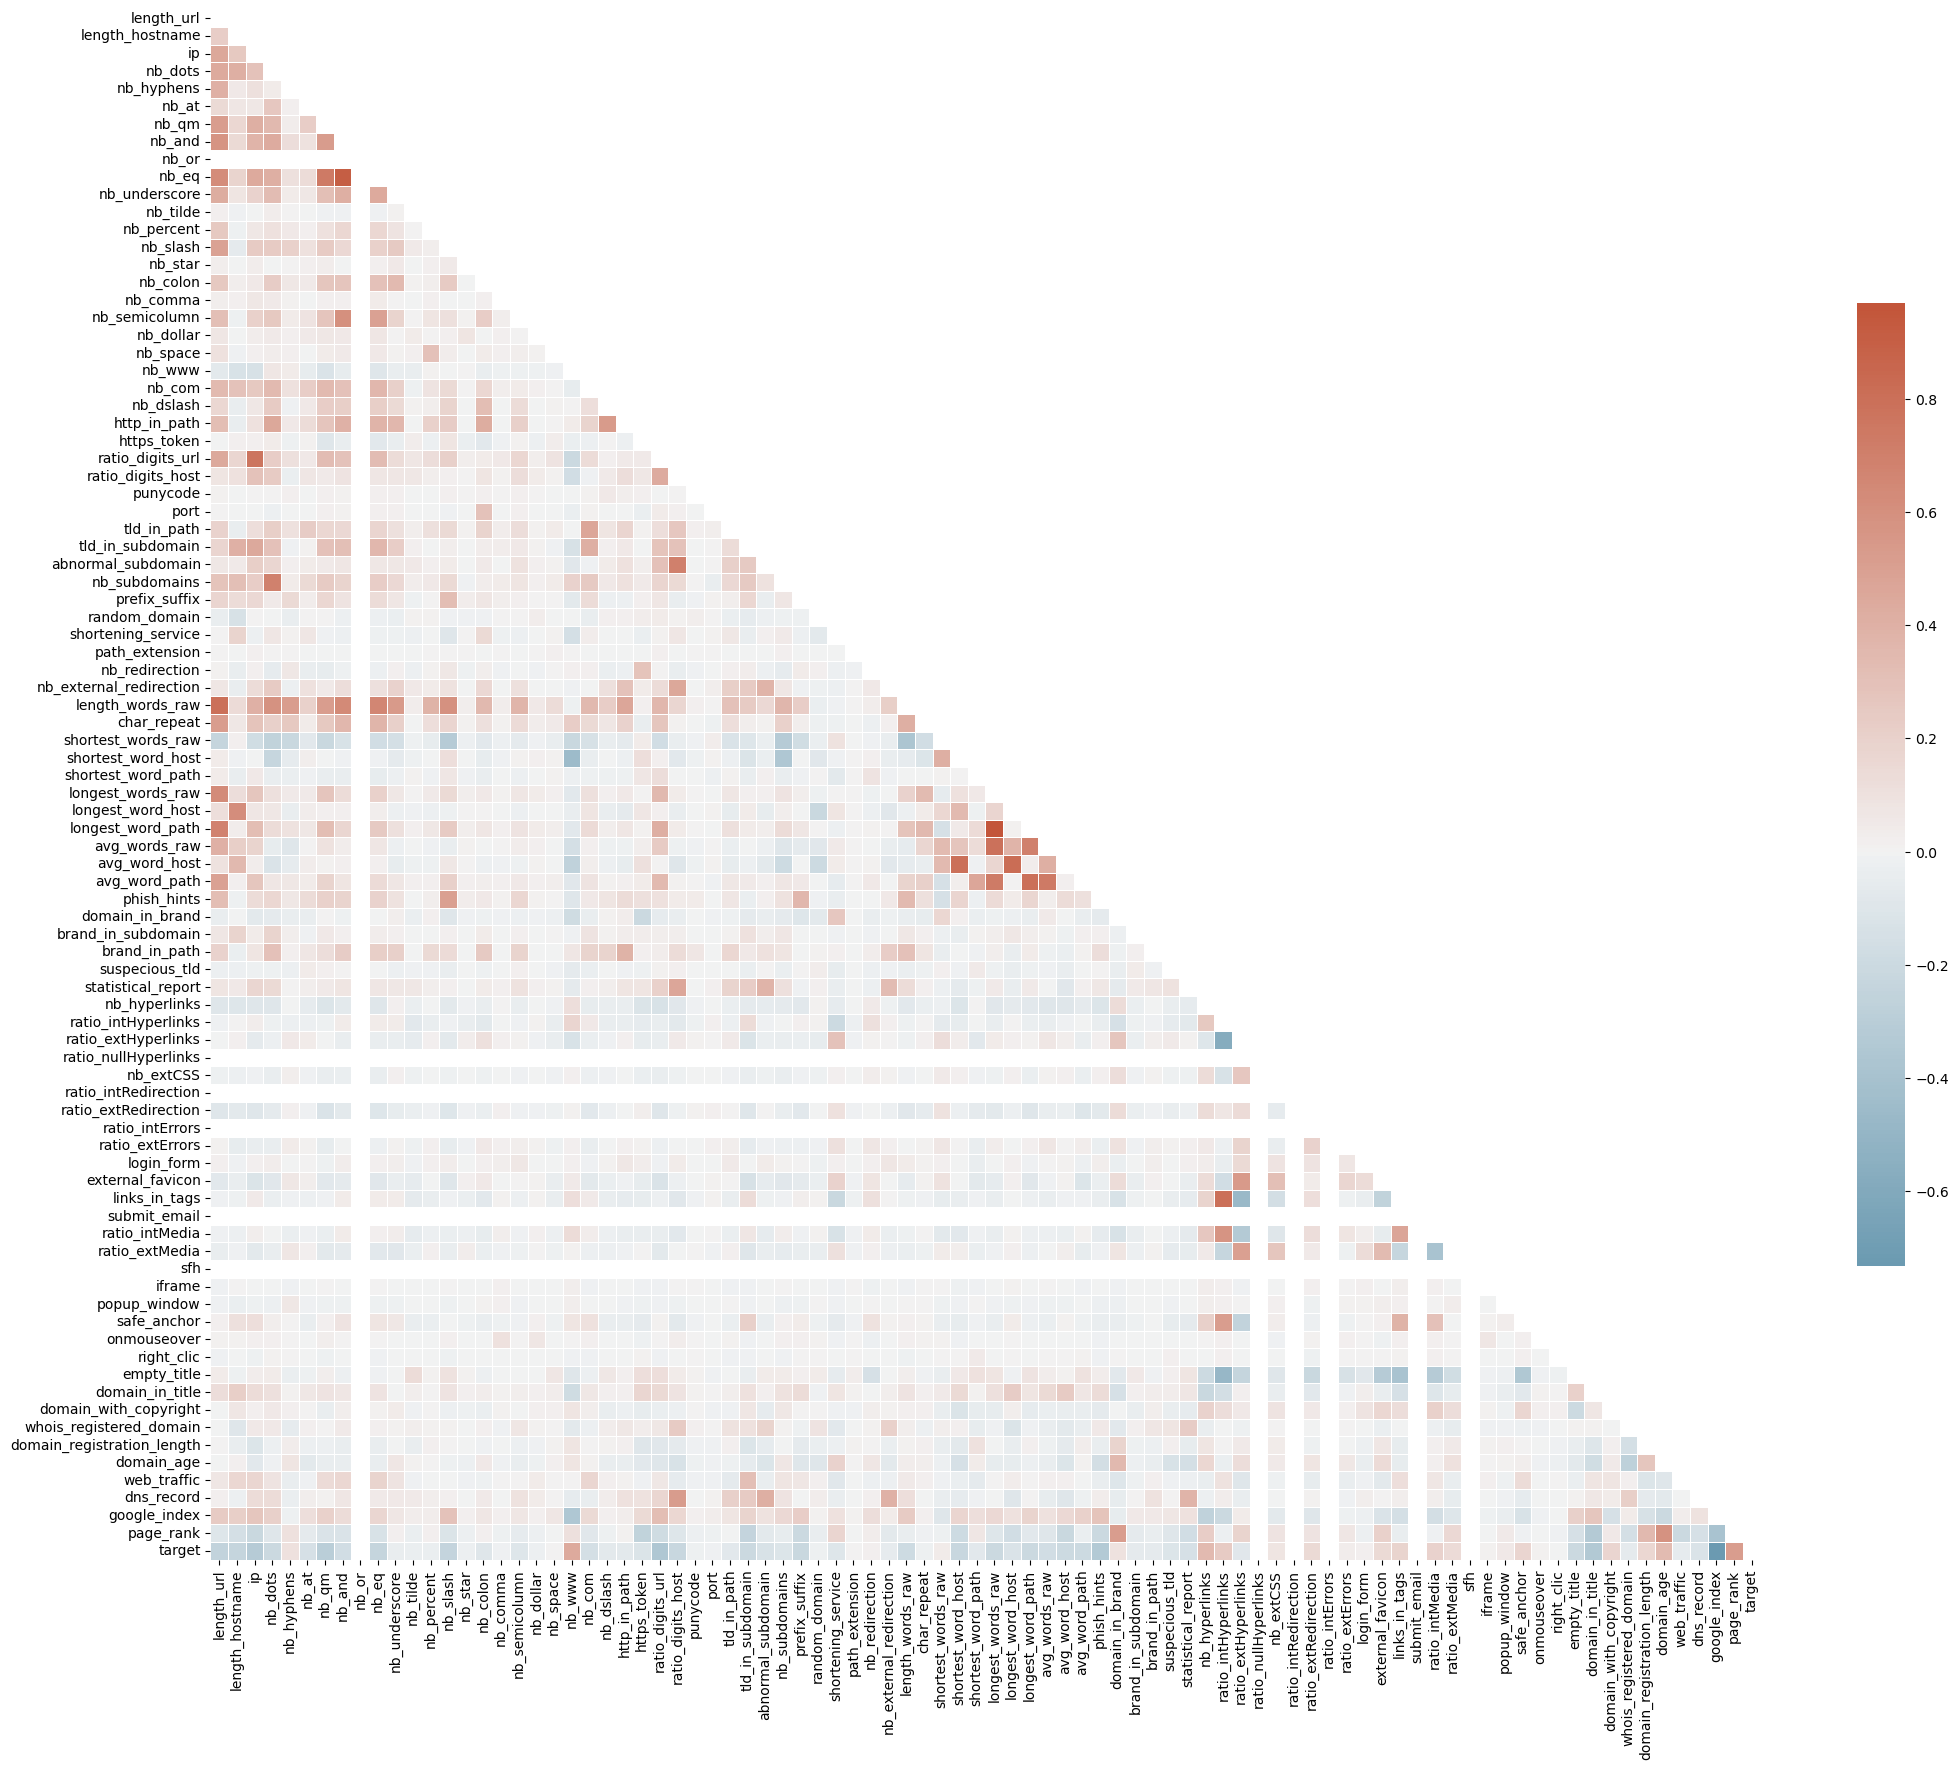

In [192]:
corr = data_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Observation 

- The correlation between some of these features are as expected (example: length_word_raw and length_url are highly correlated)
- Multicollinearity is not a concern in deep learning techniques. Models such as neural network (CNN, RNN, MLP) can handle correlated features, complex relationships and patterns from data. Though it is still necessary to normalize and scale the features to mitigate any potential issues.

In [193]:
#Scale features using standard scaler
X = data_df.drop(['url', 'target'], axis=1)
y = data_df['target']
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

# Model Architecture

I will be training the model using Convolutional Neural Network (CNN) and Recurrent Neural Network (RNN) architectures to train the dataset. Specifically, I will be using  Long Short-Term Memory (LSTM), and Gated Recurrent Unit (GRU). LSTM and GRU neural networks were designed to overcome the vanishing gradient problems of the traditional RNNs by introducing the memory cells and gating mechanisms.

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.80, random_state=151)

In [195]:
def plot(history):
    plt.plot(history.history['binary_accuracy'], 'm', label="train")
    plt.plot(history.history['val_binary_accuracy'], 'b--', label="val")
    plt.title('Train vs. Validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'],'m',label="train")
    plt.plot(history.history['val_loss'], 'b--',label="val" )
    plt.title('Train vs. Validation loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
def evaluation_metrics(model):
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob >= 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return [accuracy, precision, recall, f1]

The following LSTM model will have two LSTM layers, followed by dropout and dense layers, the model is trained using the Adam optimizer and binary cross entropy loss. Batch Normalization is also used to improve stability and convergence of the model during training. The Adam optimizer (Adaptive Moment Estimation) computes the learning rates by estimating the first and second moments of the gradients, which is then used to update the parameters of the network.

In [196]:
#LSTM
from tensorflow import keras
from tensorflow.keras import layers

LSTM = keras.Sequential([
    layers.BatchNormalization(input_shape=(87, 1)),
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dropout(0.2),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])
LSTM.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [197]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)
LSTM_history = LSTM.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=30,
    callbacks=[early_stopping],
)

Epoch 1/30
36/36 [==============================] - 13s 318ms/step - loss: 0.5961 - binary_accuracy: 0.6789 - val_loss: 0.6687 - val_binary_accuracy: 0.6671
Epoch 2/30
36/36 [==============================] - 11s 299ms/step - loss: 0.5012 - binary_accuracy: 0.7581 - val_loss: 0.6638 - val_binary_accuracy: 0.6102
Epoch 3/30
36/36 [==============================] - 10s 282ms/step - loss: 0.4671 - binary_accuracy: 0.7890 - val_loss: 0.6501 - val_binary_accuracy: 0.8031
Epoch 4/30
36/36 [==============================] - 11s 300ms/step - loss: 0.4399 - binary_accuracy: 0.7981 - val_loss: 0.6505 - val_binary_accuracy: 0.6059
Epoch 5/30
36/36 [==============================] - 11s 310ms/step - loss: 0.4253 - binary_accuracy: 0.8071 - val_loss: 0.6190 - val_binary_accuracy: 0.8075
Epoch 6/30
36/36 [==============================] - 11s 294ms/step - loss: 0.4063 - binary_accuracy: 0.8198 - val_loss: 0.6020 - val_binary_accuracy: 0.8298
Epoch 7/30
36/36 [==============================] - 11s 30

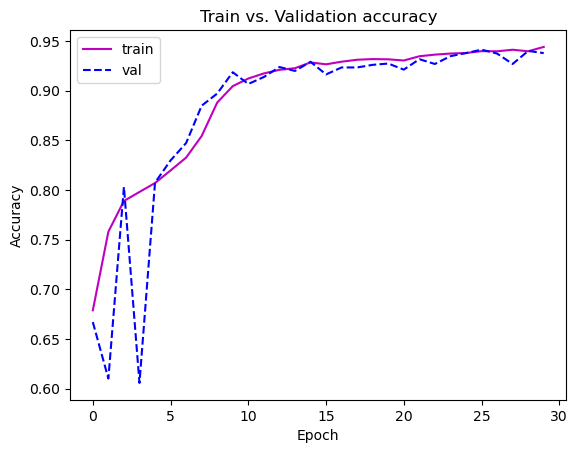

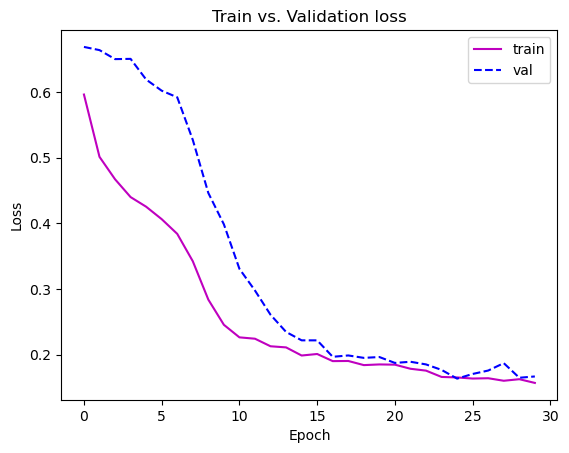

In [202]:
plot(LSTM_history)

The following CNN model have several convolutional, pooling, normalization, and fully connected layers. It is designed to prevent overfitting and improve performance.

In [198]:
CNN = keras.Sequential([
    layers.BatchNormalization(input_shape=(87, 1)),
    layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2) ,
    layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2) ,
    layers.Dropout(0.5),
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid'),
])

CNN.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [199]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)
CNN_history = CNN.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=30,
    callbacks=[early_stopping],
)

Epoch 1/30
36/36 [==============================] - 2s 29ms/step - loss: 0.4480 - binary_accuracy: 0.8248 - val_loss: 0.5815 - val_binary_accuracy: 0.7073
Epoch 2/30
36/36 [==============================] - 1s 26ms/step - loss: 0.3100 - binary_accuracy: 0.8863 - val_loss: 0.6207 - val_binary_accuracy: 0.5801
Epoch 3/30
36/36 [==============================] - 1s 27ms/step - loss: 0.2562 - binary_accuracy: 0.9021 - val_loss: 0.6695 - val_binary_accuracy: 0.5888
Epoch 4/30
36/36 [==============================] - 1s 28ms/step - loss: 0.2107 - binary_accuracy: 0.9221 - val_loss: 0.3500 - val_binary_accuracy: 0.9099
Epoch 5/30
36/36 [==============================] - 1s 29ms/step - loss: 0.2152 - binary_accuracy: 0.9220 - val_loss: 0.5445 - val_binary_accuracy: 0.6697
Epoch 6/30
36/36 [==============================] - 1s 28ms/step - loss: 0.1817 - binary_accuracy: 0.9339 - val_loss: 0.3353 - val_binary_accuracy: 0.8373
Epoch 7/30
36/36 [==============================] - 1s 28ms/step - los

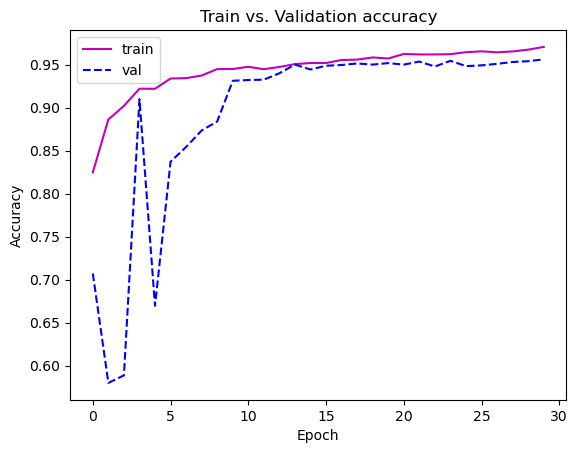

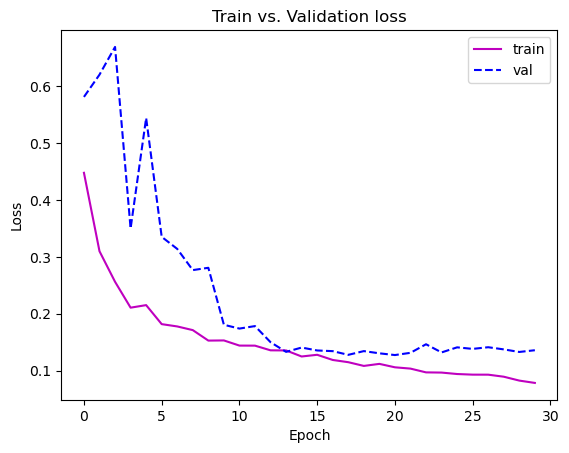

In [201]:
plot(CNN_history)

The following GRU model consist of  two GRU layers and one fully connected layer.

In [207]:
#GRU
GRU = Sequential()
GRU.add(layers.GRU(units=128, return_sequences=True, input_shape=(87, 1)))
GRU.add(layers.GRU(units=64, return_sequences=False))
GRU.add(layers.Dense(units=1, activation='sigmoid'))

GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

GRU_history = GRU.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=30,
    callbacks=[early_stopping]
)

Epoch 1/30
36/36 [==============================] - 10s 266ms/step - loss: 0.5825 - binary_accuracy: 0.7363 - val_loss: 0.3787 - val_binary_accuracy: 0.8666
Epoch 2/30
36/36 [==============================] - 10s 281ms/step - loss: 0.3382 - binary_accuracy: 0.8703 - val_loss: 0.3203 - val_binary_accuracy: 0.8832
Epoch 3/30
36/36 [==============================] - 10s 278ms/step - loss: 0.3111 - binary_accuracy: 0.8840 - val_loss: 0.3089 - val_binary_accuracy: 0.8876
Epoch 4/30
36/36 [==============================] - 10s 284ms/step - loss: 0.3017 - binary_accuracy: 0.8879 - val_loss: 0.3049 - val_binary_accuracy: 0.8885
Epoch 5/30
36/36 [==============================] - 10s 280ms/step - loss: 0.2934 - binary_accuracy: 0.8882 - val_loss: 0.2889 - val_binary_accuracy: 0.8911
Epoch 6/30
36/36 [==============================] - 10s 282ms/step - loss: 0.2826 - binary_accuracy: 0.8921 - val_loss: 0.2746 - val_binary_accuracy: 0.8955
Epoch 7/30
36/36 [==============================] - 10s 28

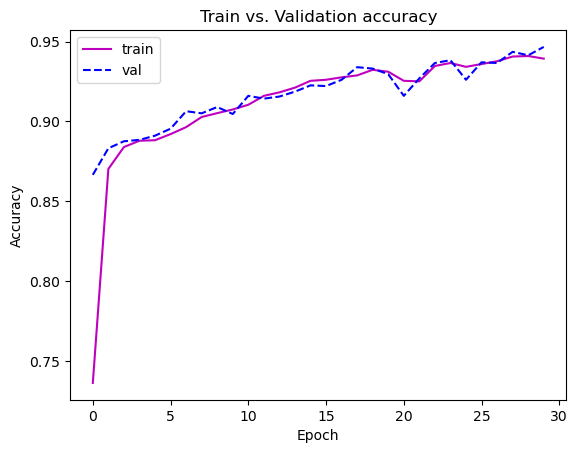

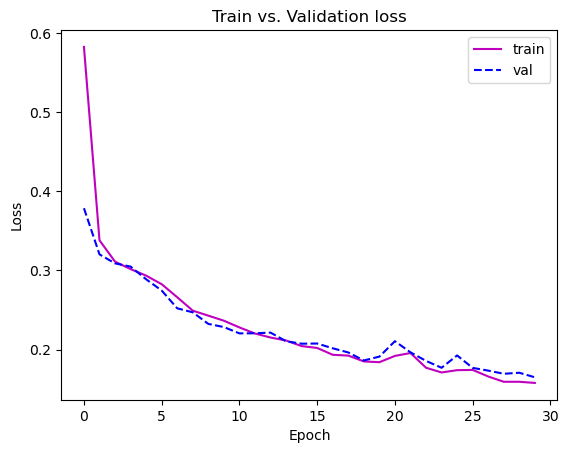

In [208]:
plot(GRU_history)

In [225]:
def evaluation_metrics(model):
    
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return [accuracy, precision, recall, f1]

In [226]:
compare = pd.DataFrame({'CNN': evaluation_metrics(CNN),
                        'LSTM': evaluation_metrics(LSTM),
                        'GRU': evaluation_metrics(GRU)})
compare.index = ['accuracy', 'precision', 'recall', 'f1_score']
compare

72/72 [==============================] - 1s 14ms/step


,CNN,LSTM,GRU
accuracy,0.951881,0.937883,0.946632
precision,0.937341,0.941748,0.950574
recall,0.968504,0.933508,0.942257
f1_score,0.952668,0.937610,0.946397


# Result and Analysis

As we can see in the result table, CNN produces the best accuracy score, follows by GRU and LSTM. However, the training vs. validation accuracy graph shows that GRU produces the most stable results for validation dataset. This shows that GRU is not overfitting or underfitting, and it has the best generalization for new and unseen dataset. I will use GRU model to perform hypertuning.

In [232]:
#GRU
learning_range = [0.1, 0.01, 0.001, 0.0001]
best_accuracy = 0
best_rate=[]

for i in learning_range:
    GRU = Sequential()
    GRU.add(layers.GRU(units=128, return_sequences=True, input_shape=(87, 1)))
    GRU.add(layers.GRU(units=64, return_sequences=False))
    GRU.add(layers.Dense(units=1, activation='sigmoid'))

    GRU.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=i), metrics=['binary_accuracy'])

    GRU_history = GRU.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=256,
        epochs=30,
        callbacks=[early_stopping], verbose=0
    )
    
    y_pred_prob = GRU.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    
    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy=accuracy_score(y_test, y_pred)
        best_rate = i
        
print (best_accuracy)
print(best_rate)

72/72 [==============================] - 1s 14ms/step
0.9413823272090989
0.01


In [236]:
batch_size = [32,64,128,256,512]
best_accuracy = 0
best_rate=[]

for i in batch_size:
    GRU = Sequential()
    GRU.add(layers.GRU(units=128, return_sequences=True, input_shape=(87, 1)))
    GRU.add(layers.GRU(units=64, return_sequences=False))
    GRU.add(layers.Dense(units=1, activation='sigmoid'))

    GRU.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

    GRU_history = GRU.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        batch_size=i,
        epochs=30,
        callbacks=[early_stopping], verbose=0
    )
    
    y_pred_prob = GRU.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    
    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy=accuracy_score(y_test, y_pred)
        best_rate = i
        
print (best_accuracy)
print(best_rate)

72/72 [==============================] - 1s 14ms/step
0.9549431321084865
32


# Conclusion

After performing hypertuning for the learning rate and batch size, we concluded that when learning rate = 0.01 and batch size = 32, the GRU model perform with highest accuracy. All three models work well with analyzing malicious URLs, especially GRU architecture as it was able generalize new and unseen dataset well. 

In future work, this project plans to implement real-time detection capabilities, where this algorithm will be able to provide immediate alerts when users encounter a potential phishing website.

Lastly, it is important to educate and raise awareness in this matter. While the algorithms aim to detect phishing websites, it does not consider user behavior and their susceptibility to phishing attacks.